# Artificial Neural network
### Nama : Annisa Karima R. Harahap
### NIM    : 09011181722029
### Kelas : SK5A

Dalam kesempeatan kali ini, saya telah menerapkan artificial intelegencia untuk menentukan hasil akurasi dari dataset yang disediakan. Saya menggunakan dataset yang bersumber dari : https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection. Di dalam data tersebut terdapat dua atribut yaitu v1 dan v2. Atribut v1 adalah kelas atau label dan v2 adalah kumpulan pesan bahasa inggris sebanyak 5571 pesan. Kemudian akan ditentukan mana yang merupakan pesan yang **sah/legitimate (HAM)** dan pesan yang merupakan **SPAM**
- HAM = Berada di kelas 0 yang berarti bukan spam 
- SPAM = Berada di kelas 1 yang berarti memang SPAM

### Approach
- Import Library
- Read Dataset
- Text Processing (Pembersihan data)
- Feature Extraction
- Artificial Neural Network
- Confusion Matrix

# A. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.activations import relu
from keras.activations import selu
from keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer


import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
import re
import string
%matplotlib inline

Using TensorFlow backend.


# B. Read Dataset

Dataset terdiri dari dua atribut yaitu v1 dan v2. Atribut v1 berisikan label yang yang terdiri dari **HAM** dan **SPAM** dan atribut v2 berisi kumpulan pesan.

In [2]:
df = pd.read_csv('D:/Data/spam.csv', encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Note :
- pd.read_csv('lokasi data dan nama data') : Digunakan untuk membaca data yang akan digunakan
- encoding='ISO-8859-1' : ISO 8859-1 digunakan untuk membaca unicode ASCII yang terdapat di dalam message

In [3]:
df.drop(df.columns[[2,3,4,]], axis = 1, inplace= True)
df.columns=['label','message']
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Terdapat 5 kolom dan 5572 baris dalam dataset tersebut. Tiga kolom terakhir seluruhnya berisi NaN sehingga kita harus menghilangkannya karena tidak terdapat data yang penting. Kemudian saya mengganti nama atribut v1 menjadi label dan v2 menjadi message

Note :
- df.drop = digunakan untuk menghapus baris dan kolom yang tidak diinginkan
- df.colums = digunakan untuk mennganti nama atribut

In [4]:
df.shape

(5572, 2)

note :
- df.shape = digunakan untuk menampilkan bentuk dari dataset yaitu jumlah dari kolom dan baris yang ada di dalam dataset

In [5]:
df.isnull().any().sum()

0

note :
- df.isnull().any().sum() = Digunakan untuk menampilkan apakah dataset tersebut berisi NaN atau tidak. 

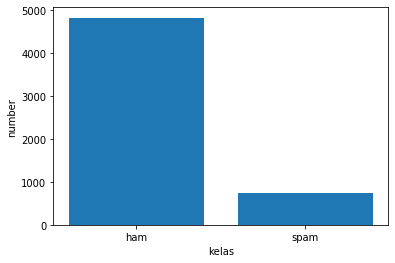

In [6]:
category_count=df.groupby('label').count() #jumlah Data yang dihitung adalah label
plt.bar(category_count.index.values, category_count['message']) # data yang ada dilabel dihubungkan dengan data yang ada di message
plt.xlabel('kelas')
plt.ylabel('number') 
plt.show()

Dilihat dari histogram HAM lebih banyak daripada SPAM.

In [7]:
# Memberi label ham menjadi 0 dan spam menjadi 1
df = df.replace(['ham','spam'],[0, 1])
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Di atribut label terdapat dua data yaitu HAM dan SPAM yang dijadikan sebagai label atau kelas. Untuk itu, saya menggantinya dengan 0 dan 1.

Note :
- df = df.replace(['"data 1"','"data 2"'],["label 1", "label 2"])
- df.replace = digunakan untuk memberi label pada data

In [8]:
df.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

Note :
- df.label.value_counts() = digunakan untuk menghitung jumlah data dari masing-masing label
- label merupakan tipe data integer

In [9]:
print (df['message'][0])
print (df['message'][1])
print (df['message'][2])
print (df['message'][3])
print (df['message'][4])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


**Ini menampilkan keseluruhan isi pesan dari atribut message. Pesan yang ditampilkan merupakan 5 pesan teratas dari atribut message**

# C. Text Preprocessing

Text preprocessing atau text mining adalah tehnik untuk mengolah data teks agar lebih tersruktur dan rapi. Text mining merupakan kegiatan membersihkan data yang berbentuk teks agar data tersebut hanya tinggal menyisahkan bagian yang dapat mewakili saja. Secara umum, text mining dibagi menjadi 4 bagian yaitu, case folding, Tokenize, stopword removal dan stemming. 

### 1. Case Folding

Case folding adalah kegiatan mengubah semua huruf kapital yang ada di dalam data menjadi huruf kecil. Penggunaan case folding juga dapat digunakan untuk menghilangkan punctuation(tanda baca). Dalam proses ini, saya akan menghilangkan tanda baca yang ada di dalam data atribut message. 

In [10]:
def remove_punctuation(message):
    new_message=''.join([char for char in message if char not in string.punctuation])
    return new_message

Kegiatan di atas merupakan kegiatan menghapus punctuation yang ada di atribut message dan membuat atribut baru dari hasil kegiatan tersebut. 

Note :
**.** join = Digunakan untuk menggabungkan character menjadi sebuah yang diberi nama ('  '). Character yang digabungkan adalah karakter yang bukan sebuah **string.punctuation**. 

In [11]:
df['new_message']=df['message'].apply(lambda row : remove_punctuation(row))

Pengaplikasian fungsi lambda untuk membuat baris baru yang diberi nama new_message.

In [12]:
print(df.message[0])
df.new_message[0]

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

Pesan yang pertama adalah pesan yang ada atribut message dan pesan yang kedua adalah pesan yang ada di atribut new_message. Jika diamati, semua punctuation seperti tanda (.) dan (,) di atribut message telah hilang seperti yang ditampilkan di pesan kedua.  

### 2. Tokenize

Data yang berbentuk teka biasanya merupakan kumpulan beberapa kalimat. Kalimat tersebut dapat dipotong menjadi token-token dengan menggunakan teknik tokenize. Dalam proses ini saya akan membuat isi data di atribut new_message menjadi token-token.

In [13]:
def tokenize(message):
    tokens=re.split('\W+',message)
    return tokens

Kegiatan di atas merupakan kegiatan memisahkan kalimat menjadi per kata yang ada di atribut new_message dan membuat atribut baru dari hasil kegiatan tersebut.

Note : 
- re.split = mengimport fungsi split pada modul re(regular expression)
- \W+ = Membuka file untuk ditulis dan dibaca. File yang dibaca dimaksudkan adalah data yang ada pada atribut message

In [14]:
df['tokenized_message']=df['new_message'].apply(lambda row : tokenize(row.lower()))

Pengaplikasian fungsi lambda untuk membuat baris baru yang diberi nama new_message.

In [15]:
print(df.new_message[0])
df.tokenized_message[0]

Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat


['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

Pesan yang pertama merupakan contoh isi data dari atribut new_message dan pesan yang kedua merupakan contoh isi data dari atribut tokenized_message. Bisa dilihat, pada pesan yang pertama, data nya masih membentuk sebuah kalimat, sedangkan setelah dilakukan tokenizing, kalimat pada pesan pertama dipisah menjadi token-token seperti yang ditampilkan pada pesan yang kedua.

### 3. Filtering
Filtering adalah kegiatan mengambil kata-kata yang penting dan membuang kata-kata yang sering muncul. Kata-kata yang sering muncul dapat berupa kata subjek, kata penghubung, dll. Stopword adalah sebutan untuk kata-kata yang tidak penting atau kurang desrkiptif tersebut. Filtering dilakukan untuk data yang berada di atribut new_message dimana data di dalamnya telah dilakukan tokenizing. Dalam tahap ini, saya akan menghapus stopword yang ada pada atribut new_message.

In [16]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

Note :
- nltk.corpus.stopwords.words('english') = digunakan untuk mengimport corpus yang ada pada platform nltk. English dimaksudkan untuk data teks yang digunakan adalah teks berbahasa inggris. Corpus tersebut dapat dijadikan acuan untuk melakukan filtering.
- Kemudian ditampilkan 20 contoh dari corpus tersebut.

In [17]:
def remove_stopwords(message):
    clean_message=[word for word in message if word not in stopwords]
    return clean_message 

Kegiatan di atas merupakan kegiatan menghapus stopword yang yang ada pada atribut message

In [18]:
df['clean_message']=df['tokenized_message'].apply(lambda row : remove_stopwords(row))

Pengaplikasian fungsi lambda untuk membuat baris baru yang diberi nama clean_message.

In [19]:
print(df.tokenized_message[0])
df.clean_message[0]

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']


['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

Pesan pertama merupakan contoh isi data di atribut tokenized_message dan pesan kedua merupakan contoh isi data di atribut clean_message. Jika diamati, kata 'until' dihilangkan karena merupakan contoh dari stopword dan ditampilkan pada pesan kedua. 

### 4. Stemming
Stemming adalah teknik mentransformasi kata dalam sebuah kalimat menjadi kata dasar. Contohnya kata 'makanan' akan diubah menjadi 'makan'. Stemming akan menghilangkan sufix dan prefix pada kata. Dalam tahap ini akan dilakukan stemming pada atribut clean_message.

In [20]:
ps = nltk.PorterStemmer()

note :
- nltk.PorterStemmer() = Digunakan untuk menggunakan algortima porter untuk yang ada di dalam modul NLTK

In [21]:
def stemming(clean_message):
    stemmed_message=[ps.stem(word) for word in clean_message]
    return stemmed_message

In [22]:
df['stemmed_message']=df.clean_message.apply(lambda row : stemming(row))

In [23]:
print(df.clean_message[0])
df.stemmed_message[0]

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']


['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

Pesan pertama merupakan contoh data di atribut clean_message dan pesan kedua merupakan contoh data di atribut stemmed_message. Jika dilihat kata 'available', dan 'amore' di pesan pertama telah berubah menjadi kata dasar seperti yang ditampilkan di pesan kedua.

### 5. Menampilkan Hasil dari Preprocessing

In [24]:
def get_final_message(stemmed_message):
    final_message=" ".join([word for word in stemmed_message])
    return final_message

In [25]:
df['final_message']=df.stemmed_message.apply(lambda row : get_final_message(row))

In [26]:
df

,label,message,new_message,tokenized_message,clean_message,stemmed_message,final_message
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å, 750, p...","[2nd, time, tri, 2, contact, u, u, å, 750, pou...",2nd time tri 2 contact u u å 750 pound prize 2...
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]",ì b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]",piti mood soani suggest
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...",guy bitch act like id interest buy someth els ...


# D. Feature Extraction

Feature extraction adalah tahapan yang berfungsi untuk mengubah data teks yang berbentuk kata menjadi vektor. Tujuan dari tahapan ini adalah membuat teks ke dalam bentuk pengklasifikasian kelas-kelas yang disediakan. Dalam data terdapat baris dengan teks sehingga kita perlu mengubah setiap kata dalam teks ini menjadi kolom atribut dengan menggunakan TfidfVectorizer. TF-IDF ni adalah singkatan dari singkatan dari “Term Frequency - Inverse Document” Frequency yang merupakan komponen dari skor yang dihasilkan yang ditetapkan untuk setiap kata.

In [27]:
tfidf_model=TfidfVectorizer() # Membuat transform
tfidf_vec=tfidf_model.fit_transform(df.final_message) # Membuat token dan kata-kata
x = pd.DataFrame(tfidf_vec.toarray()) # Membuat encode dokumen
x 

,0,1,2,3,4,5,6,7,8,9,...,8016,8017,8018,8019,8020,8021,8022,8023,8024,8025
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
y = df['label']
print (y.value_counts())

print(y[0])
print(y[1])

0    4825
1     747
Name: label, dtype: int64
0
0


In [30]:
le = LabelEncoder()
y = le.fit_transform(y)

print(y[0])
print(y[1])

0
0


Note :
- label encoder() = Digunakan untuk memberi label pada kelas agar bisa dibaca oleh komputer. 
- fit_transform(y) = membentuk kelas menjadi 0 dan 1

# E. Artificial Neural Network

### Spliting
Data yang ada akan dibagi secara acak, dengan persentase 80% untuk data training dan 20% untuk data testing. 

In [45]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.20, random_state = 0)

In [46]:
# change label to one hot encoder
ytrain_one_hot = to_categorical(ytrain)
ytest_one_hot = to_categorical(ytest)

In [47]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### Model

Dalam tahap ini, saya menggunakan 3 layer.
- Layer pertama adalah hidden layer sekaligus input layer. Hidden layer yang digunakan sebanyak 50 dan input layer sebanyak 8026. Fungsi aktivasi yang digunakan adalah 'selu'
- Layer kedua adalah hidden layer sebanyak 2 yang menggunakan fungsi aktivasi softmax
- Layer ketiga adalah output layer

In [82]:
model = Sequential()
model.add(Dense(50, input_dim=8026, activation='selu'))#Input layer
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
acc_training = model.fit(xtrain, ytrain_one_hot, epochs=200,verbose=1,validation_data=(xtest, ytest_one_hot),batch_size=32)
acc_testing = model.evaluate(xtest, ytest_one_hot)

Train on 4457 samples, validate on 1115 samples
Epoch 1/200
4457/4457 [==============================] - 21s 5ms/step - loss: 0.6838 - acc: 0.6493 - val_loss: 0.6754 - val_acc: 0.7587
Epoch 2/200
4457/4457 [==============================] - 4s 986us/step - loss: 0.6666 - acc: 0.8275 - val_loss: 0.6594 - val_acc: 0.8583
Epoch 3/200
4457/4457 [==============================] - 4s 824us/step - loss: 0.6496 - acc: 0.8878 - val_loss: 0.6436 - val_acc: 0.8628
Epoch 4/200
4457/4457 [==============================] - 3s 769us/step - loss: 0.6326 - acc: 0.8867 - val_loss: 0.6278 - val_acc: 0.8610
Epoch 5/200
4457/4457 [==============================] - 3s 574us/step - loss: 0.6157 - acc: 0.8813 - val_loss: 0.6120 - val_acc: 0.8592
Epoch 6/200
4457/4457 [==============================] - 3s 723us/step - loss: 0.5988 - acc: 0.8777 - val_loss: 0.5963 - val_acc: 0.8574
Epoch 7/200
4457/4457 [==============================] - 5s 1ms/step - loss: 0.5819 - acc: 0.8761 - val_loss: 0.5807 - val_acc: 0.8

Epoch 60/200
4457/4457 [==============================] - 4s 837us/step - loss: 0.1649 - acc: 0.9450 - val_loss: 0.2073 - val_acc: 0.9166
Epoch 61/200
4457/4457 [==============================] - 3s 578us/step - loss: 0.1616 - acc: 0.9473 - val_loss: 0.2043 - val_acc: 0.9193
Epoch 62/200
4457/4457 [==============================] - 3s 583us/step - loss: 0.1585 - acc: 0.9500 - val_loss: 0.2013 - val_acc: 0.9247
Epoch 63/200
4457/4457 [==============================] - 3s 604us/step - loss: 0.1553 - acc: 0.9518 - val_loss: 0.1984 - val_acc: 0.9256
Epoch 64/200
4457/4457 [==============================] - 3s 701us/step - loss: 0.1522 - acc: 0.9529 - val_loss: 0.1955 - val_acc: 0.9265
Epoch 65/200
4457/4457 [==============================] - 3s 769us/step - loss: 0.1492 - acc: 0.9547 - val_loss: 0.1927 - val_acc: 0.9274
Epoch 66/200
4457/4457 [==============================] - 3s 626us/step - loss: 0.1462 - acc: 0.9551 - val_loss: 0.1899 - val_acc: 0.9283
Epoch 67/200
4457/4457 [==========

4457/4457 [==============================] - 5s 1ms/step - loss: 0.0545 - acc: 0.9881 - val_loss: 0.1022 - val_acc: 0.9659
Epoch 119/200
4457/4457 [==============================] - 3s 756us/step - loss: 0.0536 - acc: 0.9881 - val_loss: 0.1014 - val_acc: 0.9668
Epoch 120/200
4457/4457 [==============================] - 5s 1ms/step - loss: 0.0527 - acc: 0.9881 - val_loss: 0.1006 - val_acc: 0.9668
Epoch 121/200
4457/4457 [==============================] - 5s 1ms/step - loss: 0.0518 - acc: 0.9883 - val_loss: 0.0998 - val_acc: 0.9668
Epoch 122/200
4457/4457 [==============================] - 4s 969us/step - loss: 0.0510 - acc: 0.9883 - val_loss: 0.0990 - val_acc: 0.9668
Epoch 123/200
4457/4457 [==============================] - 4s 946us/step - loss: 0.0502 - acc: 0.9886 - val_loss: 0.0982 - val_acc: 0.9668
Epoch 124/200
4457/4457 [==============================] - 5s 1ms/step - loss: 0.0493 - acc: 0.9886 - val_loss: 0.0975 - val_acc: 0.9668
Epoch 125/200
4457/4457 [========================

4457/4457 [==============================] - 3s 677us/step - loss: 0.0225 - acc: 0.9948 - val_loss: 0.0760 - val_acc: 0.9731
Epoch 178/200
4457/4457 [==============================] - 4s 829us/step - loss: 0.0222 - acc: 0.9948 - val_loss: 0.0758 - val_acc: 0.9740
Epoch 179/200
4457/4457 [==============================] - 4s 891us/step - loss: 0.0219 - acc: 0.9951 - val_loss: 0.0756 - val_acc: 0.9740
Epoch 180/200
4457/4457 [==============================] - 3s 740us/step - loss: 0.0216 - acc: 0.9951 - val_loss: 0.0755 - val_acc: 0.9740cc: 
Epoch 181/200
4457/4457 [==============================] - 3s 669us/step - loss: 0.0213 - acc: 0.9955 - val_loss: 0.0753 - val_acc: 0.9740
Epoch 182/200
4457/4457 [==============================] - 4s 796us/step - loss: 0.0211 - acc: 0.9955 - val_loss: 0.0751 - val_acc: 0.9740
Epoch 183/200
4457/4457 [==============================] - 4s 864us/step - loss: 0.0208 - acc: 0.9955 - val_loss: 0.0749 - val_acc: 0.9740
Epoch 184/200
4457/4457 [============

In [84]:
acc_testing

[0.07318325126752458, 0.9739910313901345]

In [85]:
print('akurasi = {}'.format(acc_testing[1]))

akurasi = 0.9739910313901345


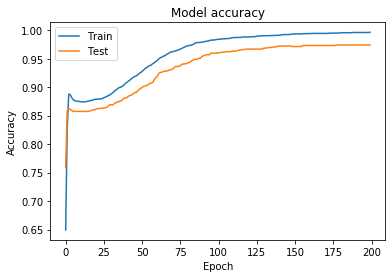

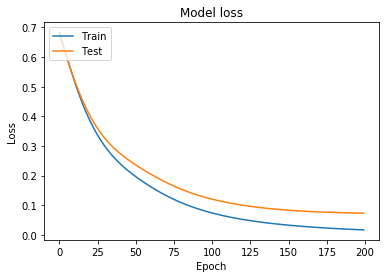

In [86]:
# Plot training & validation accuracy values

plt.plot(acc_training.history['acc'])
plt.plot(acc_training.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [87]:
acc_training.history

{'val_loss': [0.6753745980326905,
  0.6594258624876561,
  0.6435538303157139,
  0.6277861697256832,
  0.6119799229596228,
  0.5962739522681643,
  0.5806967732617674,
  0.5653421172112093,
  0.5502775291690912,
  0.5356132081805858,
  0.521265028891542,
  0.5073633331621709,
  0.49391045391292315,
  0.4809138423391522,
  0.4683758260690578,
  0.45627118407878103,
  0.44466499384208646,
  0.4334706821249205,
  0.42273067840011663,
  0.41242336296714477,
  0.4026024708833395,
  0.3931471838812122,
  0.3841417960521886,
  0.37545579214801705,
  0.36720636048659083,
  0.3592942829891171,
  0.3517004523309357,
  0.3444655108344929,
  0.33753656622005684,
  0.33091017777609716,
  0.32456357569972494,
  0.3184949892117838,
  0.31263250120552133,
  0.3070627874991284,
  0.3016737420462707,
  0.296525391976395,
  0.29153929428936654,
  0.28675424290879425,
  0.28214796821632726,
  0.2777088545496688,
  0.2733916700420893,
  0.2692336552346234,
  0.26518944320122756,
  0.26125961363048295,
  0.25

# F. Confusion Matriks

Confusion matriks digunakan untuk mengevaluasi hasil prediksi. Klasifikasi yang digunakan adalah klasifikasi binary yaitu 1 dan 0. Untuk itu ada 4 kemungkinan prediksi yang akan digunakan yaitu True Positive, False Positive, False Negative dan True Negative. 
- True Positive (TP) = Data yang berada di kelas 1 dan hasil prediksi bernilai 1 
- False Negative (FN) = Data yang berada di kelas 0 dan hasil prediksi bernilai 0
- False Positive (FP) = Data yang berada di kelas 0 dan hasil prediksi bernilai 1
- False Negative (FN) = Data yang berada di kelas 1 dan hasil prediksi bernilai 0

In [88]:
ypred = model.predict_classes(xtest)

In [89]:
cm = confusion_matrix(ytest, ypred)

In [90]:
cm

array([[947,   2],
       [ 27, 139]], dtype=int64)

In [91]:
print(ytest)
print(ypred)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [92]:
report = classification_report(ytest, ypred)

In [93]:
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       949
           1       0.99      0.84      0.91       166

    accuracy                           0.97      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.97      0.97      0.97      1115



- Accurasy = Rasio prediksi benar (positive dan negative) dengan keseluruhan data
- Precission =  Rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf
- Recall = Rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif
- f1-score = F1 Score merupakan perbandingan rata-rata presisi dan recall yang dibobotkan

HASIL ANALISA
- Akurasi = 97 %
---------------------
- Precision
- kelas 0 = 97 %
- kelas 1 = 99 %
---------------------
- Recall
- kelas 0 = 100 %
- kelas 1 = 84 %
---------------------
- F1-score
- kelas 0 = 98 %
- kelas 1 = 91 %
